作者：云朵君  
公众号：数据STUDIO  
代码仓促整理，若有问题，请及时练习云朵君  

并通过算法预测客户 访问的转化结果

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import auc,accuracy_score,recall_score,f1_score

/Users/jim/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/jim/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# 读取清洗完的数据

In [117]:
Xtrain_new = pd.read_csv('Xtrain_new.csv',index_col=0)
Xtrain_new.head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,-1.0,0.133,0.0,1.139221,27.0,1050.0,0.0
1,23823.0,3.353,1753.0,1.139221,257.0,5780.0,14.0
2,30793.0,1.613,30792.0,1.200000,205.0,3616.0,11.0
3,355113.0,0.140,806.0,1.000000,184.0,1064.0,13.0
4,161858.0,0.007,19664.0,1.000000,286.0,1468.0,14.0


In [118]:
Xtest_new = pd.read_csv('Xtest_new.csv',index_col=0)
Xtest_new.head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,1116.0,12.653,19.0,1.020000,814,6408.0,5
1,-1.0,0.280,2862.0,1.138505,2,1292.0,11
2,198614.0,3.133,8856.0,1.000000,73,345.0,23
3,16440.0,4.913,222.0,1.250000,33,325.0,15
4,5079.0,0.020,1869.0,1.190000,85,9218.0,16


In [18]:
Ytrain = pd.read_csv('Ytrain.csv',index_col=0,header=None)
Ytrain.head(1)

,1
0,
0,0


In [34]:
Ytest = pd.read_csv('Ytest.csv',index_col=0,header=None)
Ytest.head(1)

,1
0,
317270,0


In [36]:
Ytest.reset_index(drop=True)
ytest = Ytest.values.reshape(1,-1)[0]

In [26]:
ytrain = Ytrain.values.reshape(1,-1)[0]
ytrain

array([0, 1, 0, ..., 0, 0, 0])

In [40]:
from sklearn.model_selection import cross_val_score
from time import time
import datetime

# 模型调参数

## 弱评估器选择

23:04:214531
0.7180918548591728 0


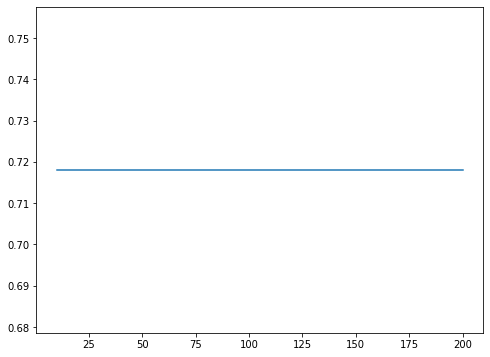

In [50]:
score = []
time0 = time()
for i in range(10,201,10):
    rfc = RFC(n_estimators= i
             ,max_depth=3
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print(max(score),np.argmax(score))
plt.figure(figsize=(8,6))
plt.plot(range(10,201,10),score)
plt.show();

## 最大深度选择

05:41:132984
得分： 0.8939818849773287 最大深度： 20


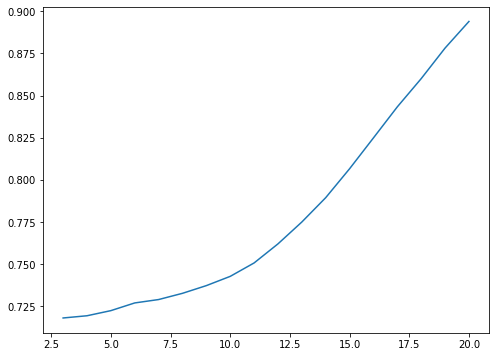

In [79]:
score = []
time0 = time()
for i in np.arange(3, 21, 1):
    rfc = RFC(n_estimators= 10
             ,max_depth= i
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print('得分：',max(score),'最大深度：',np.arange(3, 21, 1)[np.argmax(score)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(3, 21, 1),score)
plt.show();

## 最小分割样本数选择

08:21:638368
得分： 0.8066083426188453 最小分支数： 2


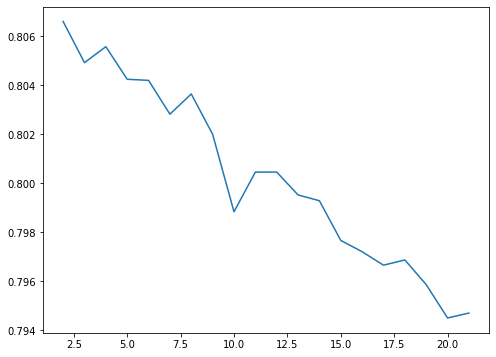

In [80]:
score_2 = []
time0 = time()
for i in np.arange(2, 22, 1):
    rfc = RFC(n_estimators= 10
             ,max_depth= 15
             ,min_samples_split= i
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score_2.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print('得分：',max(score_2),'最小分支数：',np.arange(2, 22, 1)[np.argmax(score_2)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(2, 22, 1),score_2)
plt.show();

## 最小叶子结点样本数选择

04:14:709608
得分： 0.8066083426188453 最小叶子数： 1


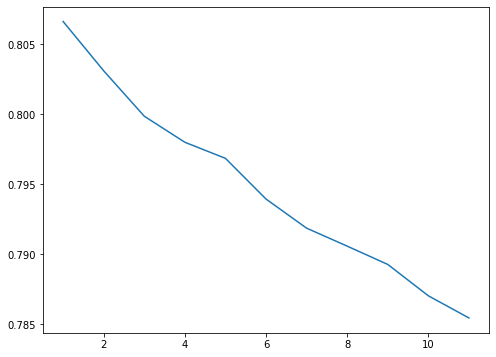

In [81]:
score_3 = []
time0 = time()
for i in np.arange(1, 12, 1):
    rfc = RFC(n_estimators= 10
             ,max_depth= 15
             ,min_samples_split= 2
             ,min_samples_leaf = i
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score_3.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print('得分：',max(score_3),'最小叶子数：',np.arange(1, 12, 1)[np.argmax(score_3)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 12, 1),score_3)
plt.show();

## 最小评估器再次选择

31:49:492826
0.9043809229615084 最佳分类器数： 180


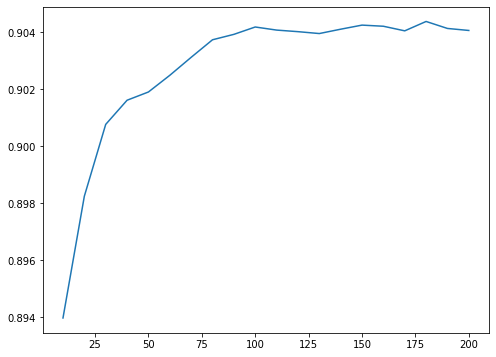

In [102]:
score_4 = []
time0 = time()
for i in range(10,201,10):
    rfc = RFC(n_estimators= i
             ,max_depth=20
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score_4.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%H:%M:%S"))
print(max(score_4),'最佳分类器数：',range(10,201,10)[np.argmax(score_4)])
plt.figure(figsize=(8,6))
plt.plot(range(10,201,10),score_4)
plt.show();
# 运行1个半小时

# 确定参数

In [106]:
clf = RFC(n_estimators=180
         ,max_depth=15
         ,min_samples_leaf=1
         ,min_samples_split=2
         ,random_state=0
         )
clf = clf.fit(Xtrain_new,ytrain)

In [107]:
clf.score(Xtrain_new,ytrain)

0.8311662235362908

In [108]:
clf.score(Xtest_new,ytest)

0.8119391458799907

In [109]:
 clf = RFC(n_estimators=180
         ,max_depth=20
         ,min_samples_leaf=1
         ,min_samples_split=2
         ,random_state=0
         )
clf = clf.fit(Xtrain_new,ytrain)

In [110]:
clf.score(Xtrain_new,ytrain)

0.9425305870282317

In [111]:
clf.score(Xtest_new,ytest)

0.9049398923983833

In [75]:
# from sklearn.model_selection import GridSearchCV 

In [ ]:
# time0 = time()
# rfc = RFC(n_estimators= 10
#           ,random_state=0)
# GS = GridSearchCV(rfc,param_grid,cv=5)
# GS.fit(Xtrain_new,ytrain)
# print('最佳参数：',GS.best_params_)
# print('最高得分：',GS.best_score_)
# print(datetime.datetime.fromtimestamp(time()-time0).strftime("%H:%M:%S"))

In [112]:
clf.feature_importances_

array([0.12778966, 0.13655849, 0.12457015, 0.13714743, 0.10208397,
       0.13347588, 0.14272563, 0.09564879])

In [113]:
Xtest_new.columns

Index(['lasthtlordergap', 'cityuvs', 'cityorders', 'lastpvgap', 'cr', 'sid',
       'visitnum_oneyear', 'h'],
      dtype='object')

In [114]:
from sklearn.metrics import auc, roc_curve

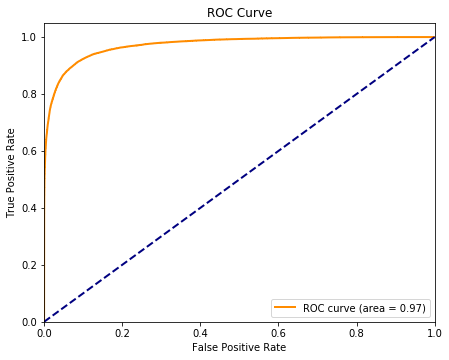

In [116]:
from sklearn.metrics import auc, roc_curve
model = RFC(n_estimators=180
         ,max_depth=20
         ,min_samples_leaf=1
         ,min_samples_split=2
         ,random_state=0
         )
# ROC
y_score = model.fit(Xtrain_new, ytrain).predict_proba(Xtest_new)  # 随机森林
fpr, tpr, thresholds = roc_curve(ytest, y_score[:, 1])
roc_auc = auc(fpr, tpr)
def drawRoc(roc_auc,fpr,tpr):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
drawRoc(roc_auc, fpr, tpr)

预测分数高

In [ ]:
from sklearn.metrics import auc, roc_curve
model = RFC()
# ROC
y_score = model.fit(Xtrain, ytrain).predict_proba(Xtest)  # 随机森林
fpr, tpr, thresholds = roc_curve(ytest, y_score[:, 1])
roc_auc = auc(fpr, tpr)
def drawRoc(roc_auc, fpr, tpr):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
drawRoc(roc_auc, fpr, tpr)